<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/M%C3%A9tricas_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/modifiedBostonHousing.csv"
df = pd.read_csv(filename)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

1.Analisis y Depuracion de Datos

In [30]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    505 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [31]:
df2=df
df2 = df2.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df2.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [32]:
df2.shape

(506, 4)

In [33]:
df2.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [34]:
# Elimine filas enteras del marco de datos si contienen nans o 'todos'
# this may not be the best strategy for our dataset
df2 = df2.dropna(how = 'any')

In [35]:
# No hay más valores perdidos
df2.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

2. Visualizacion y Analsis de Variables cuantitativas

In [36]:
df2.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [37]:
df2.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


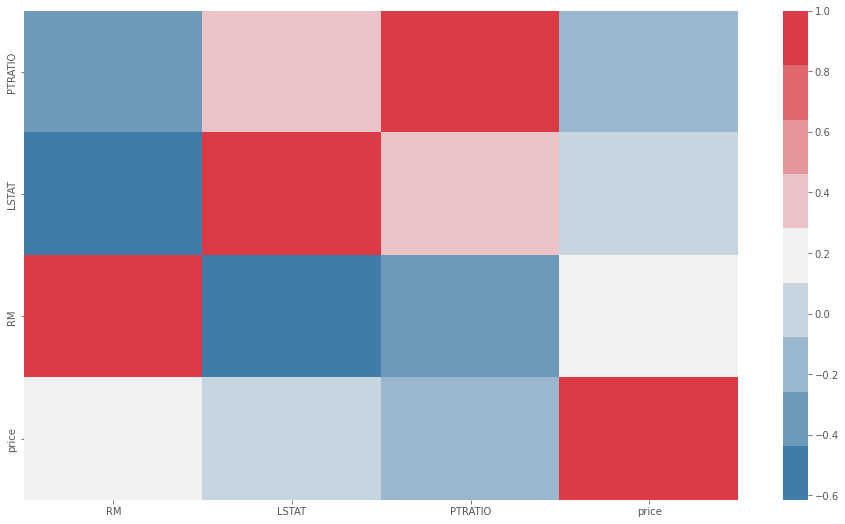

In [38]:
# Puede utilizar un mapa de calor para facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df2.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

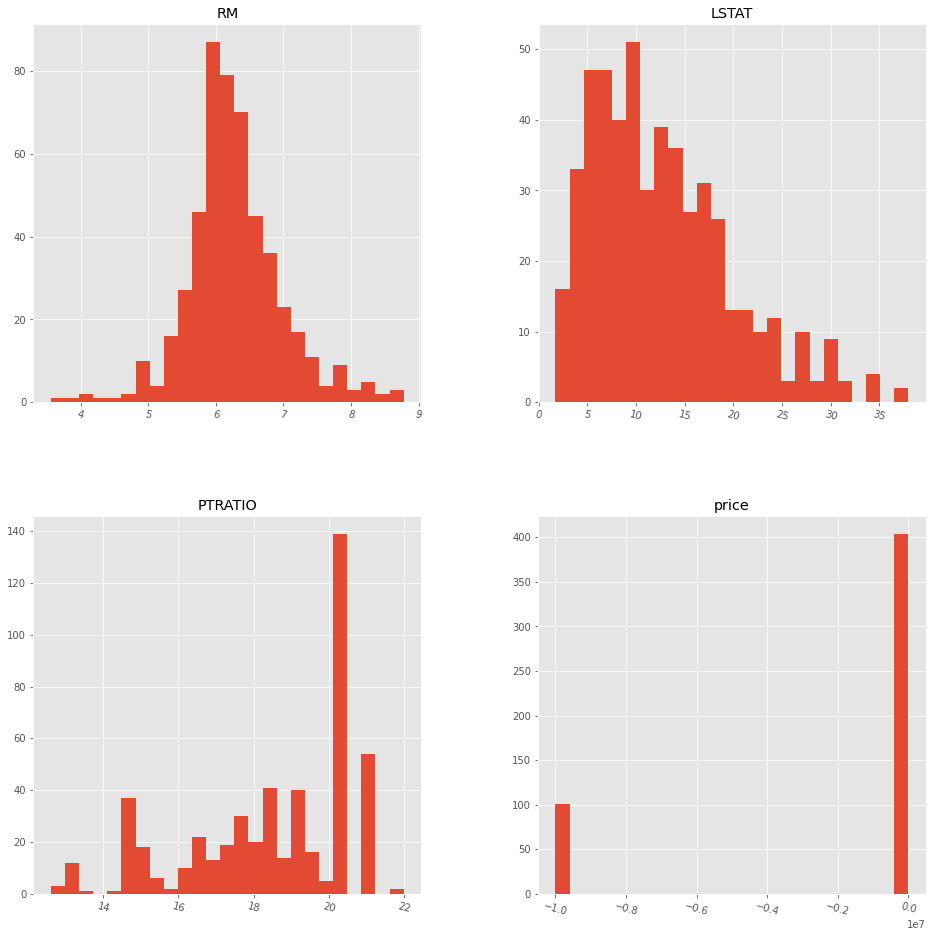

In [39]:
df2.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [40]:
priceFilter = df2.loc[:, 'price'] < 0 
df2 = df2.loc[~priceFilter, :]

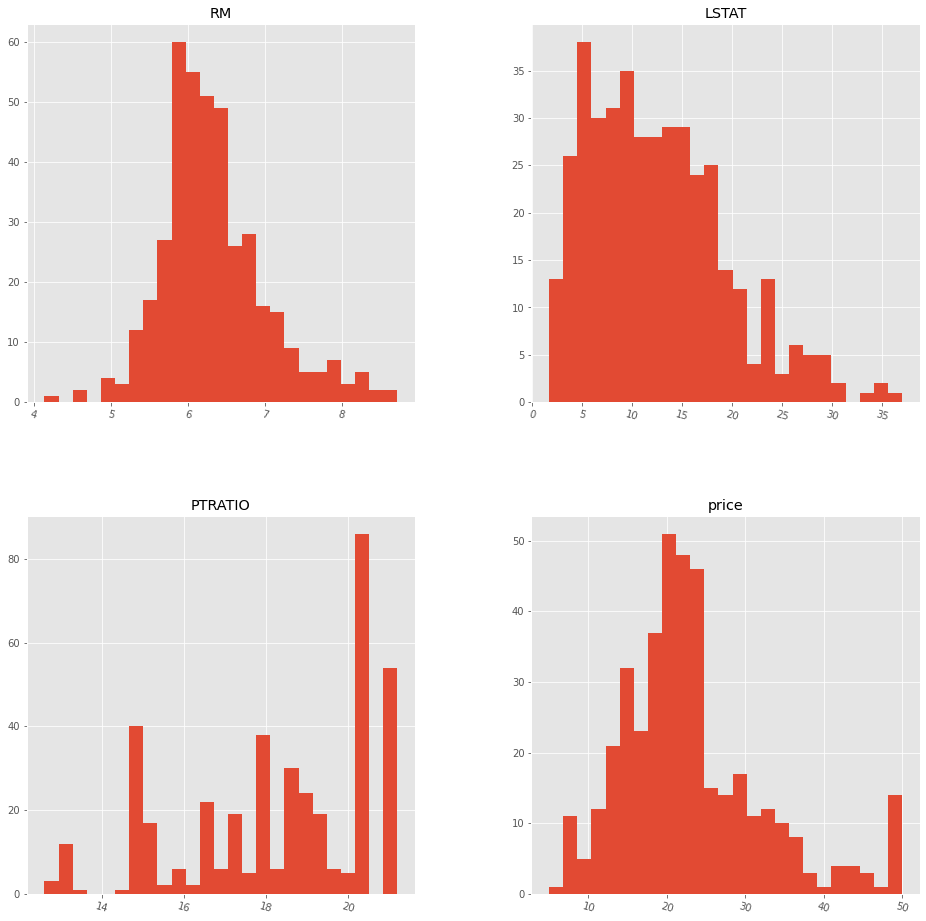

In [41]:
df2.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

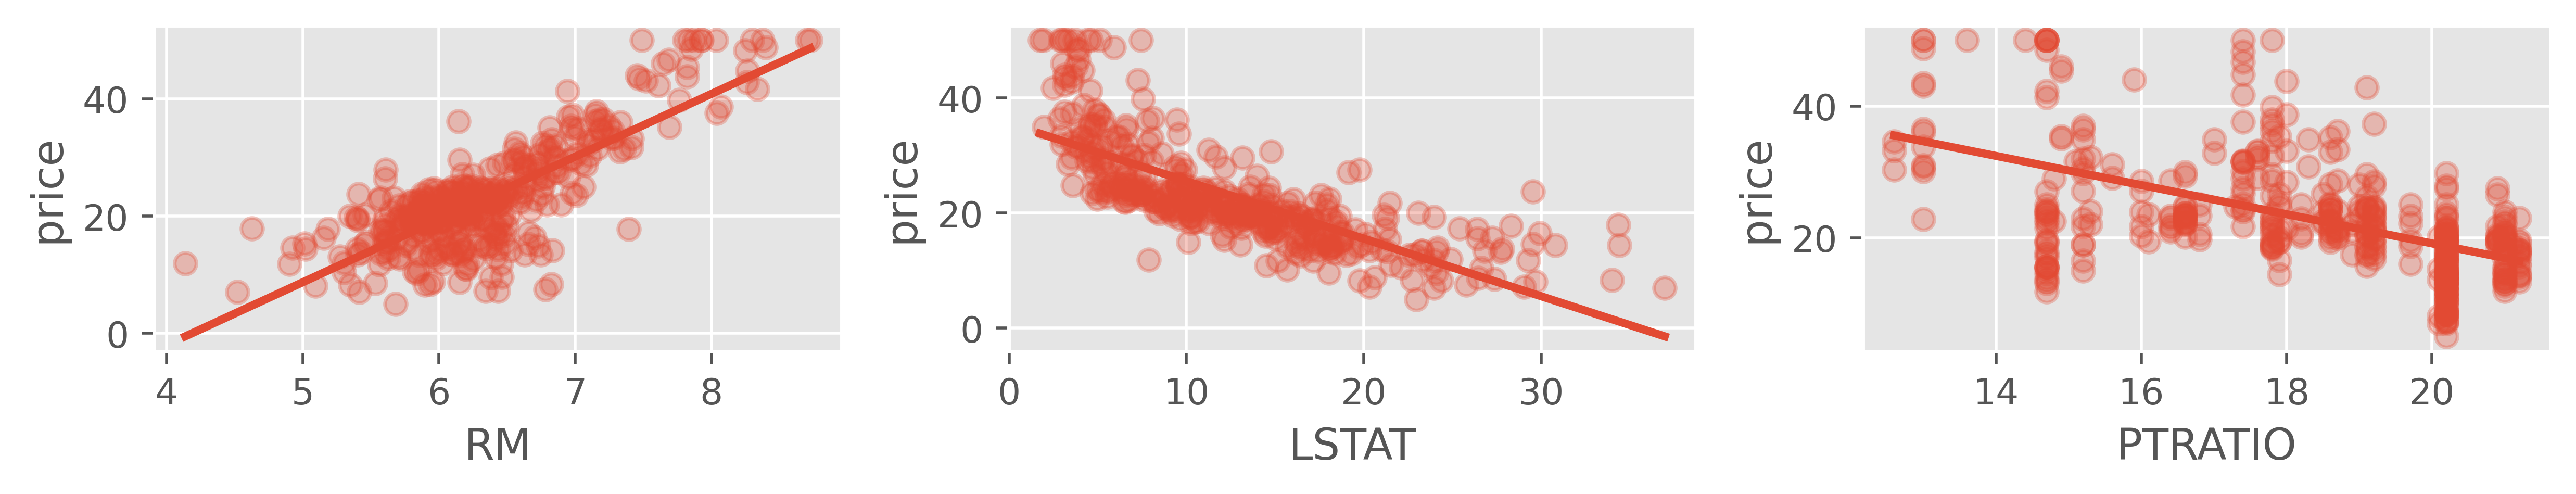

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=500)
sns.regplot(x='RM', y='price', data=df2, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df2, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df2, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [43]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df2.to_excel("bostonhousingmod.xlsx", index=False)

3.Creacion y Optimizacion de Modelo Predictivo


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [45]:
X = df2[['RM','LSTAT','PTRATIO']].values
y = df2['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [50]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 3

knn = KNeighborsRegressor(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.84


In [56]:
pred=knn.predict(X_test)

4. Calculo de MAE-MSE-RMSE

In [57]:
#MAE
import numpy as np

def mae(y_test, pred):
    y_test, predictions = np.array(y_test), np.array(pred)
    return np.mean(np.abs(y_test - pred))

print(mae(y_test, pred))

2.679781420765028


In [71]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

12.878797814207655

In [73]:
#RMSE
import numpy as np
diff=np.subtract(y_test,pred)
square=np.square(diff)
MSE=square.mean()
RMSE=np.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

Root Mean Square Error: 3.5887041970894806
